# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.1 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 1 Nov_23/foodhub_order.csv')

In [ ]:
  # View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Number of rows and columns are present in the data

In [ ]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset.

### Datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:



* Total 1898 rows have values for all the columns which indicates no missing value in the given dataset.
* There are 5 numerical columns and 4 object type columns in the data.
* The object type columns contain categories in them
* day_of_the_week is of object type which should be of date-time format.
* food_preparation_time & delivery_time is of numerical type which should be of date-time format.

### Missing values treatment using an appropriate method.

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


* Ratings column has "Not Given" value provided for the orders with no ratings.
* There are no missing values for any columns.

### Statistical summary of the data. Minimum, average, and maximum time it takes for food to be prepared once an order is placed.

In [ ]:
df.describe() # Gets the statistical summary of the entire dataset
df['food_preparation_time'].describe().loc[['min','mean','max']] #returns minimum, average, and maximum time of food_preparation_time column.

,food_preparation_time
min,20.00000
mean,27.37197
max,35.00000


#### Observations:


* Minimun time for food to be prepared once an order placed is 20mins
* Maximum time for the food to be prepared is 27.37 mins once the order is placed
* Average time for the food to be prepared is 35mins

### Orders that are not rated.

In [ ]:
df['rating'].value_counts().iloc[0:1]

,count
rating,
Not given,736


#### Observations:
* Ratings for 736 orders out of 1898 orders are not provided.
* Orders with no ratings are given 'Not given' value.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all the variables and providing observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
# Observations on order ID column
df['order_id'].nunique()

1898

Observations:
* Each row represents order received in Food hub application and each order has unique order_id value.
* There are totally 1898 orders with unique order_id values.

In [ ]:
# Observations on customer ID column
df['customer_id'].nunique()

1200

Observations:

* There are 1200 unique customer_id values.
* 698 customer_id have repeated orders as there are 1898 rows for each order in the dataset.

In [ ]:
# Obervations on Restaurant Name column
df['restaurant_name'].nunique()

178

Observations:

* There are 178 unique values for restaurant name column.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

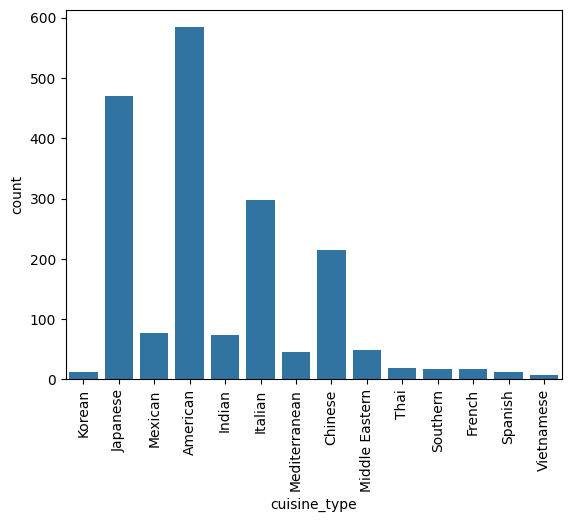

In [ ]:
#Observations on cuisine_type
# Bar chart is used to explore cateogorical variable distribution.
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)

Observations:

* American cuisine is the most ordered cuisine type followed by Japanese, Italian, Chinese cuisines.
* Cuisine_type variable is right skewed.

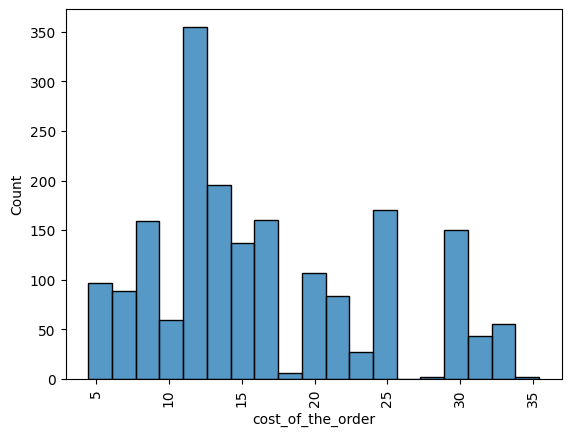

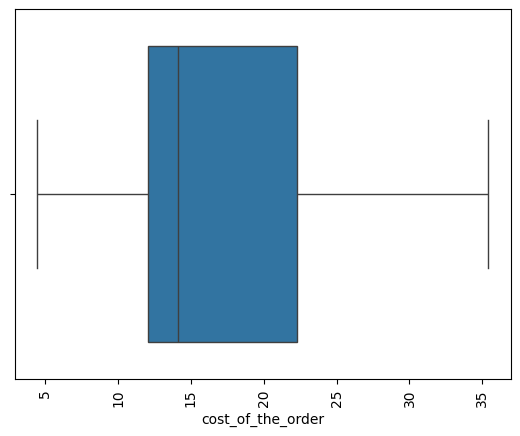

In [ ]:
# Observations on cost_of_the_order column
sns.histplot(data=df,x='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x='cost_of_the_order',)
plt.xticks(rotation=90)
plt.show()

Observations:

* Cost of most of the orders placed is around $12
* There are no outliers
* cost_of_the_order	is slightly right skewed.



<Axes: xlabel='day_of_the_week', ylabel='count'>

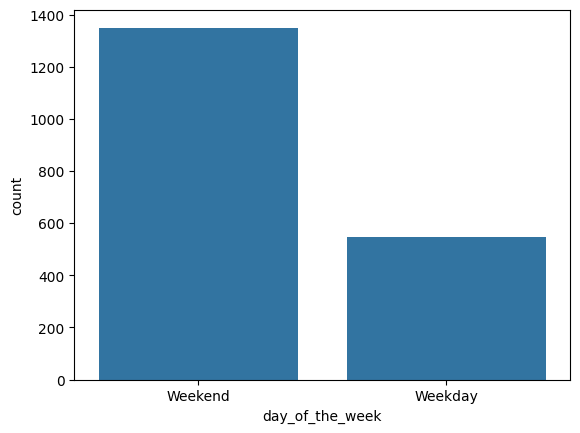

In [ ]:
#Observations on day_of_the_week
# Bar chart is used to explore cateogorical variable distribution.
sns.countplot(data=df,x='day_of_the_week')

Observations:

* No of orders on weekend is higher than that of weekdays


<Axes: xlabel='rating', ylabel='count'>

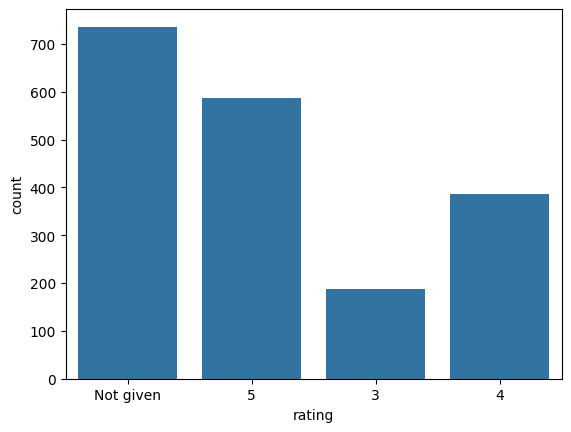

In [ ]:
#Observations on ratings
# Bar chart is used to explore cateogorical variable distribution.
sns.countplot(data=df,x='rating')

Observations:

* There are more orders with no ratings. Almost for 730 orders ratings are not provided.
* The most orders are given 5 ratings, in the dataset where ratings are given.


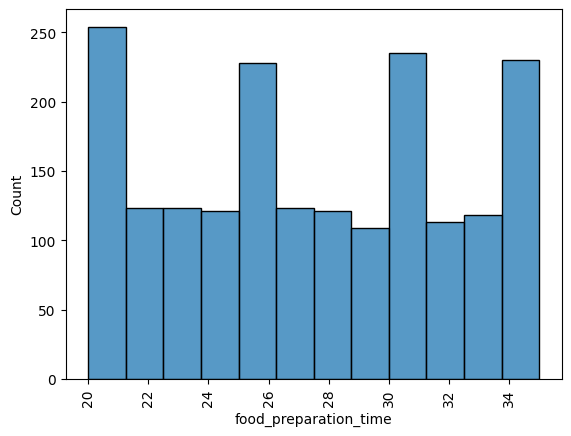

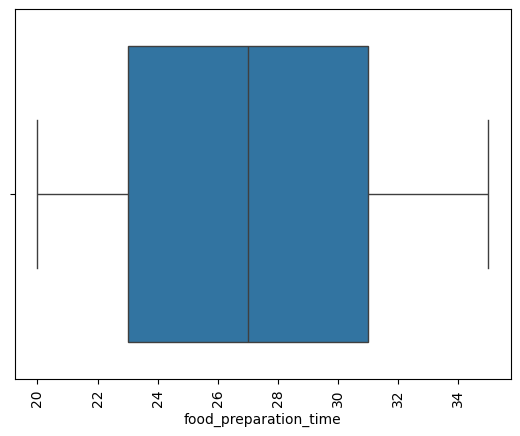

In [ ]:
# Observations on food_preparation_time
sns.histplot(data=df,x='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

Observations:


* The average food preparation time taken is around 27mins
* 50% of time taken for food preparation is below 27mins
* Food prepartion time do not have outiers



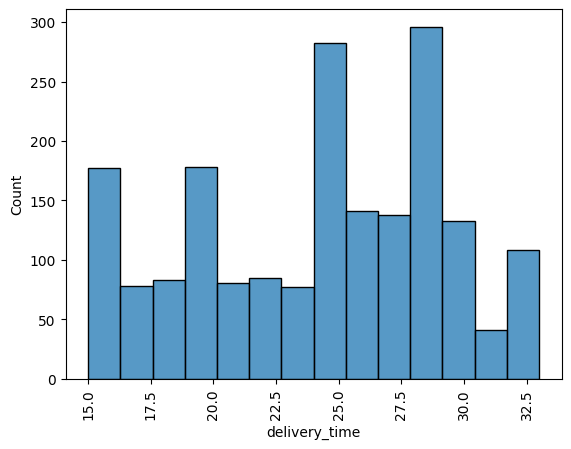

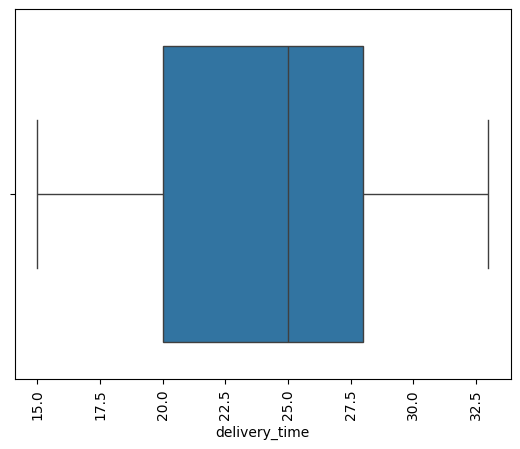

In [ ]:
# Observations on delivery_time
sns.histplot(data=df,x='delivery_time')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x='delivery_time')
plt.xticks(rotation=90)
plt.show()

Observations:

* Average delivery_time for orders is 25mins
* There are no outliers
* delivery_time	is slightly left skewed.






### Top 5 restaurants in terms of the number of orders received.

In [ ]:
df['restaurant_name'].value_counts().iloc[0:5]

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* Shake Shack is the top most restaurant with highest of 219 number of orders.
* value_counts() returns the count of orders of each restaurant and iloc is used to return the top 5 restuarants with the count.


### Finding the most popular cuisine on weekends

In [ ]:
df.groupby(['cuisine_type','day_of_the_week'])['day_of_the_week'].value_counts().sort_values(ascending=False).iloc[0:1]

,,count
cuisine_type,day_of_the_week,
American,Weekend,415


#### Observations:
American cuisine is the most famous cuisine on the weekends with total of 415 orders.

### percentage of orders that cost more than 20 dollars

In [ ]:
pd.DataFrame({'Orders > 20': (df.loc[df['cost_of_the_order'] > 20].shape[0]),' Percentage': (df.loc[df['cost_of_the_order'] > 20].shape[0]/df.shape[0]*100)}, index=[0])

,Orders > 20,Percentage
0,555,29.241307


#### Observations:

* 29.241307 is the percentage of the orders cost more than 20 dollars




### Mean order delivery time

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

* The average delivery time of an order is 24.25279 mins.

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Finding the IDs of these customers and the number of orders they placed

In [ ]:
df['customer_id'].value_counts().iloc[0:3]

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


* 52832, 47440 & 83287 are the top 3 frequent customers who will be given 20% discount vouchers.
* 52832 customer have places highest of 13 orders.



### Multivariate Analysis

### Performing a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


<Figure size 1800x1500 with 0 Axes>

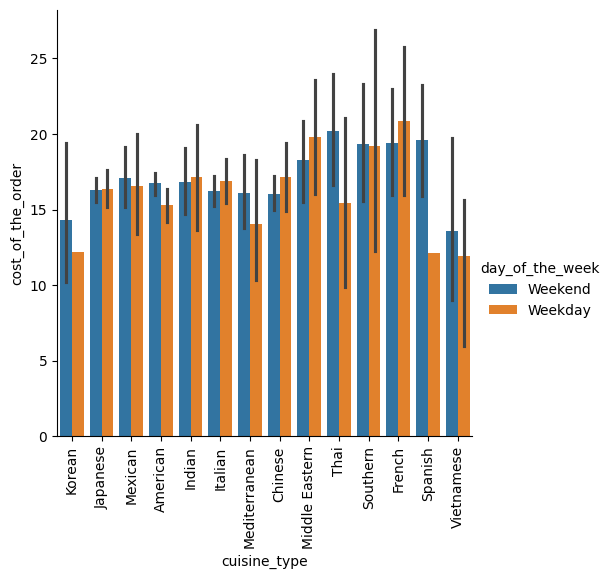

In [ ]:
# Relationship between cost of the order, cuisine type & day_of_the_week
# Relationship between numerical and two categorical variable
plt.figure(figsize=(18,15))
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations:
* Mean value of cost of the order for all the cuisine_type is greater than 11 dollars and lesser than 21 dollars
* Korean, Vietnamese and Mediterranean cuisine_type have a few outliers
* French cuisine_type has the highest mean value of cost of order during weekday
* Thai cuisine_type has the highest mean cost of the order value during weekend.
* Vietnamese cuisine_type has the lowest mean value of cost of order during both weekday and weekend.

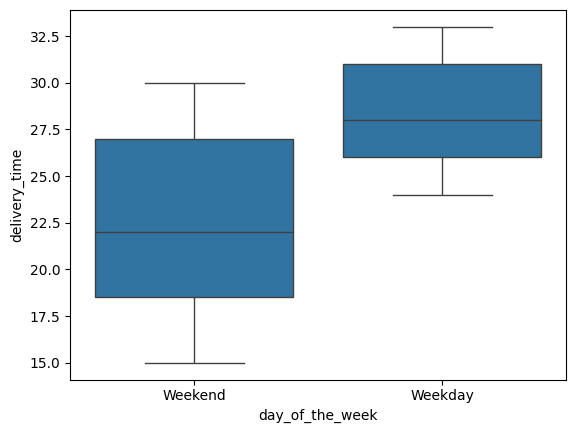

In [ ]:
# Relationship between day of the week and delivery time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.show()

Observations:
* Delivery time of the order on a weekday is higher than that of the weekend.

<ipython-input-53-8ca780e071c0>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x="cuisine_type", y="total_time", hue='day_of_the_week', ci=False)


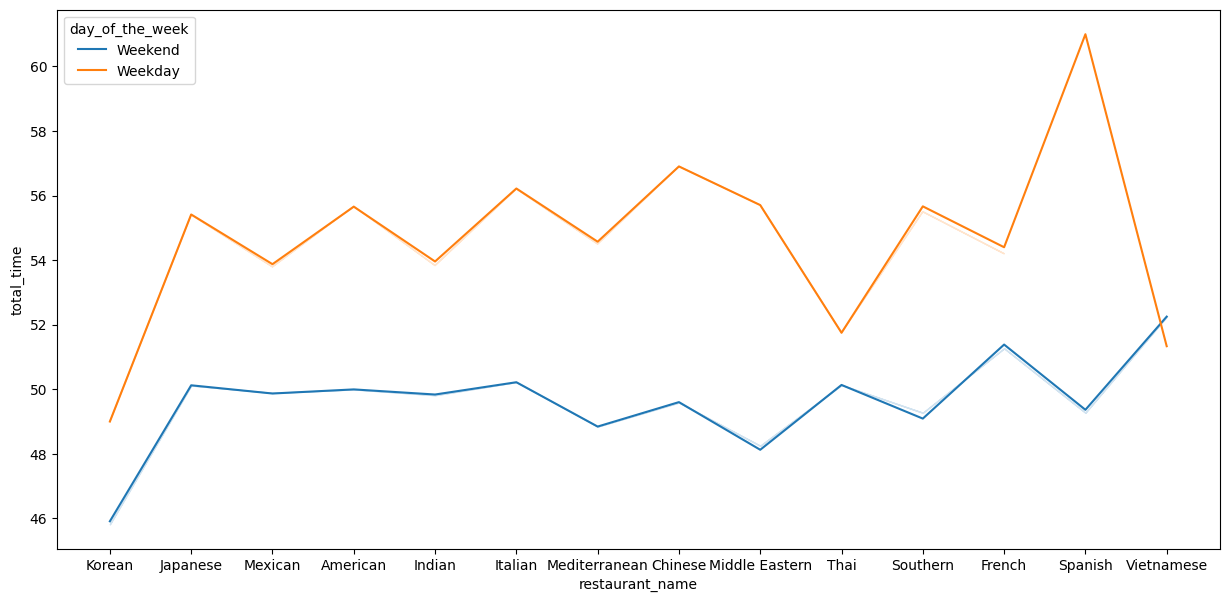

In [ ]:
# Calculating total time taken for the food to be prepared and delivered once an orde is placed
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Relationship between cuisine_type, day of the week and total time taken once the order is placed online
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="cuisine_type", y="total_time", hue='day_of_the_week', ci=False)
plt.ylabel('total_time')
plt.xlabel('restaurant_name')
plt.show()

Observations:

* Total time taken to prepare and deliver the order is lesser in restaurants with Korean cuisine type on both weekend and weekday.
* Spanish restaurants has highest time taken for the preparing and delivery of the food on weekday
* Vietnamese restaurants has highest time taken for the preparing and delivery of the food on weekend

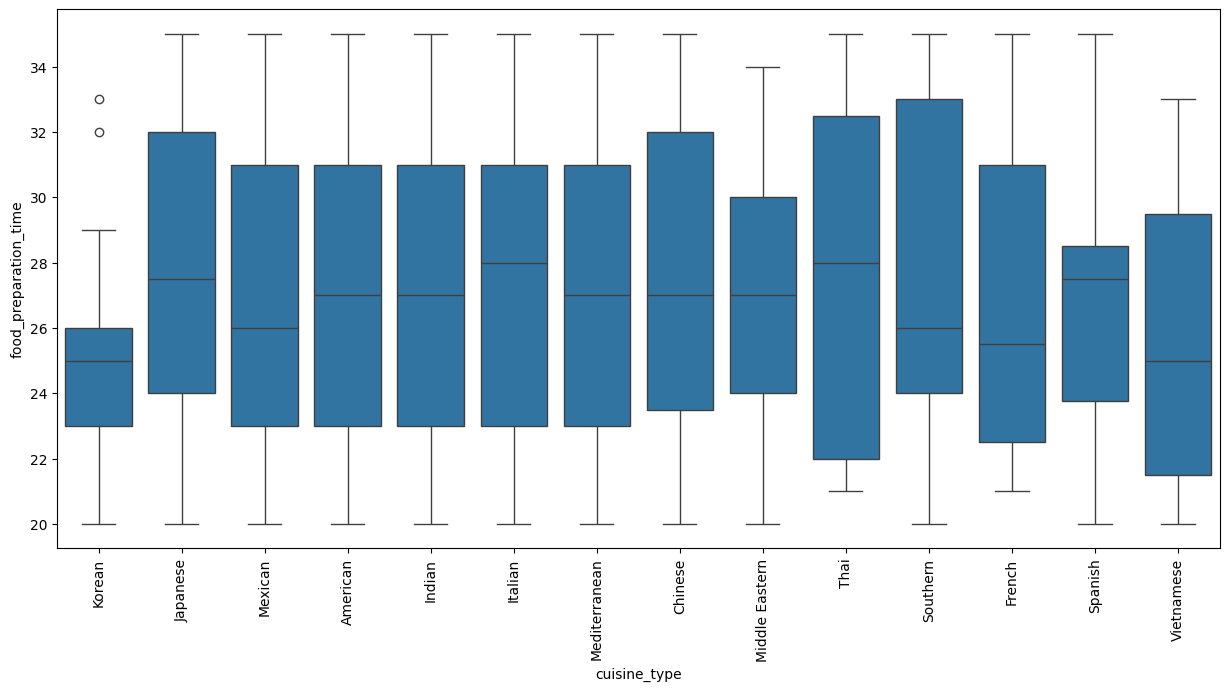

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.xticks(rotation = 90)
plt.show()

Observations:
* Median value of food prepartion time taken for the Italian and Thai cuisine type is the highest.
* Korean cuisine type has some outliers for food preparation time.

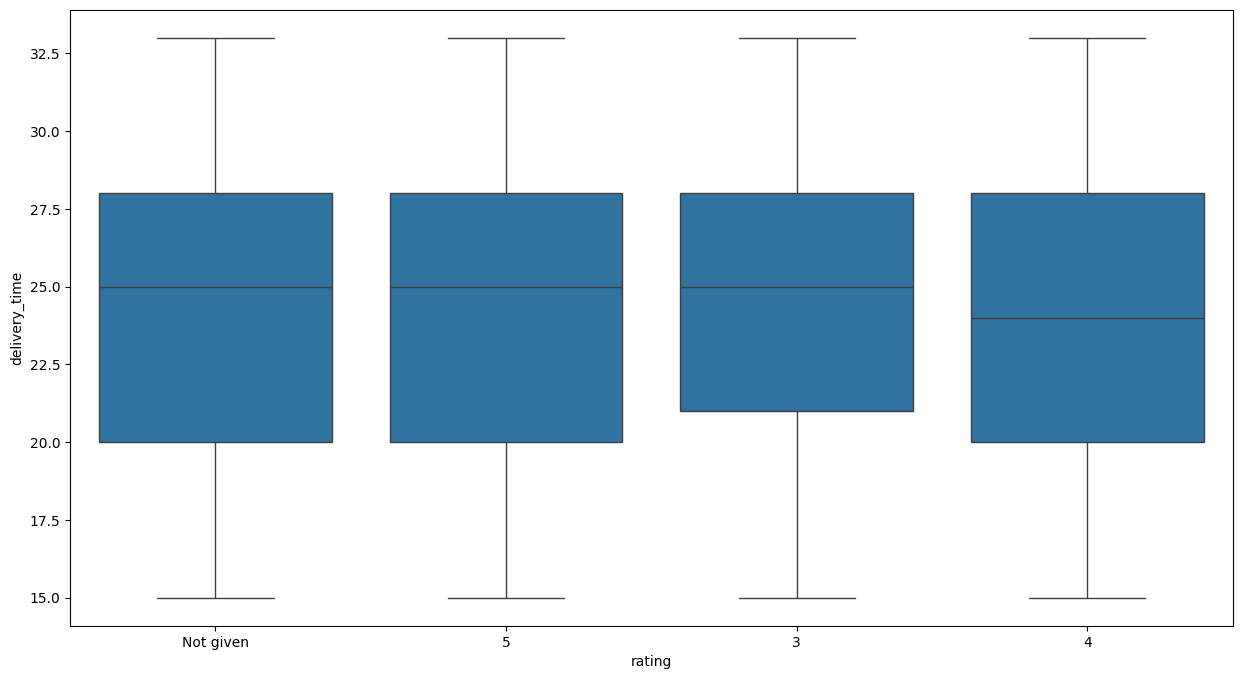

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observations:
* Delivery time for the orders with no ratings, 5 & 3 have the same median delivery time value of 25 mins.
* Delivery time for the orders with rating 4 is lesser than the median of other orders

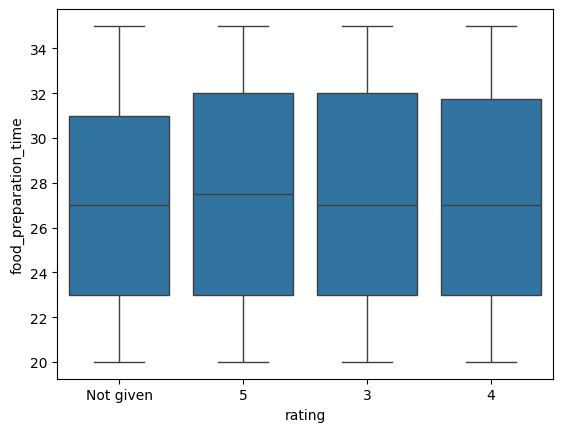

In [ ]:
# Relationship between rating and food preparation time
sns.boxplot(x = "rating", y = "food_preparation_time", data = df)
plt.show()

Observations:
* Food preparation time for the orders with 5 ratings has the highest Median value compared with the other orders.
* Orders with no ratings, 5 & 3 have the same median food preparation time value of 27 mins.

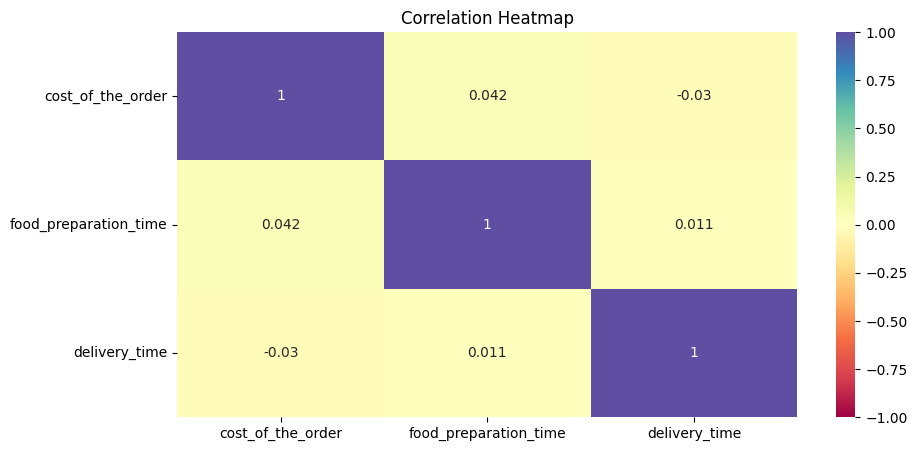

In [ ]:
# Correlation among numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']
corr = df[num_var].corr()
# ploting the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Observations:
* cost of the order and food preparation time has the most correlation compared to the other two variables.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Finding the restaurants that fulfill this criteria to get the promotional offer.

In [ ]:
# Unique values of rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Imputing rating column value which are not given
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'].unique()

array([nan, '5', '3', '4'], dtype=object)

In [ ]:
# Converting rating column from object to integer
df['rating'] = df['rating'].astype('Int64')
# Applying the condition to get the offer
rating_agg= df.groupby(['restaurant_name','rating'])['rating'].agg(['count','mean'])
rating_agg = rating_agg.loc[(rating_agg['count'] > 50) & (rating_agg['mean'] > 4)]
rating_agg

,,count,mean
restaurant_name,rating,,
Shake Shack,5,60,5.0
The Meatball Shop,5,53,5.0


#### Observations:

* Shake Shack and The Meatball shop restaurants fullfill the criteria to get the promotional offer with rating 5 and count greater than 50.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Finding the net revenue generated by the company across all orders.

In [ ]:
#function to determine the revenue
def revenue(rev):
    if rev > 20:
        return rev*0.25
    elif rev > 5:
        return rev*0.15
    else:
        return rev*0

df['revenue'] = df['cost_of_the_order'].apply(revenue)
total_revenue = df['revenue'].sum()
print('The net revenue generated by the company across all orders is', total_revenue, 'dollars')

The net revenue generated by the company across all orders is 6166.303 dollars


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.loc[df['total_time'] > 60].shape[0]/df.shape[0]*100

10.537407797681771

#### Observations:

* Total time required to deliver the food is calculated by adding food preparation time & delivery time.
* 10.53 percentage of orders take more than 60 minutes to get delivered from the time the order is placed

###The company wants to analyze the delivery time of the orders on weekdays and weekends.

In [ ]:
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean = df[df['day_of_the_week'] != 'Weekday']['delivery_time'].mean()
print('Mean delivery time on weekdays:', weekday_mean)
print('Mean delivery time on weekends:', weekend_mean)

Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


#### Observations:
* Mean delivery time on weekends are lesser than that of the weekday.

###  Conclusion and Recommendations

### Conclusions:

The dataset contains 1898 rows, each representing a unique order with an order ID ranging from 1476547 to 1478444.
*  Delivery time of the orders on the weekends are lesser than that of the weekdays
* Orders for the Restaurants with American cuisine type is higher compared to tge other restaurants
* Shake Shack restaurant has the highest number of orders placed with cost of order as 3579.53 generated in the given data set.
* American cusine type is the most ordered cuisine type on both weekend and weekdays
* Orders of American cuisine type has more ratings data provided followed by japanese cuisine type.

### Recommendations:

* Restaurants serving American cuisine receive the most orders, followed by Japanese, Italian, and Chinese cuisines. This suggests that adding more restaurants offering these cuisines to the app could be beneficial.
* For other cuisine types, offering promotions or coupons could help boost order volume.
* It is recommended to focus on optimizing weekday promotions and strategies, as orders are placed more frequently on weekends. This mightbhelp in significant increase compared to weekdays.
* Delivery times are longer on weekdays compared to weekends, which may contribute to the higher order volume on weekends. Additional analysis could reveal opportunities to reduce weekday delivery times and potentially increase more orders.
* The dataset indicates that American and Japanese cuisines receive the most ratings. Collecting more rating data could offer further insights into the correlation between ratings and no of orders.

---